<a href="https://colab.research.google.com/github/alepnabil/Dog_cat_image_classification/blob/main/Dog_cat_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi


Wed Aug 18 03:07:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
from tensorflow import keras

from keras.applications import vgg16
from keras.layers import Dense,Activation,Dropout,MaxPool2D,Conv2D
import numpy as np
import glob
from keras.preprocessing import image
import cv2 as cv
from numpy import asarray
import os
import pandas as pd

## Getting the data from Gdrive

In [3]:
train_files=glob.glob('/content/drive/MyDrive/Manual data set/training/*')
test_files=glob.glob('/content/drive/MyDrive/Manual data set/test/*')

## Convert the images to arrays

In [4]:
img_res=(150,150)
train_imgs=[image.img_to_array(image.load_img(img,target_size=img_res)) for img in train_files]
test_imgs=[image.img_to_array(image.load_img(img,target_size=img_res)) for img in test_files]

In [5]:
print('The number of training sample is : ', len(train_imgs))
print('The number of test sample is : ', len(test_imgs))

The number of training sample is :  202
The number of test sample is :  100


# Getting train and test labels

In [6]:
training_labels=[train_labels.split('/')[-1].split('.')[0] for train_labels in train_files ]
test_labels=[test_labels.split('/')[-1].split('.')[0] for test_labels in test_files ]


# Let's see some of the picture

In [7]:
cat_img=[image.load_img(img) for img in train_files]

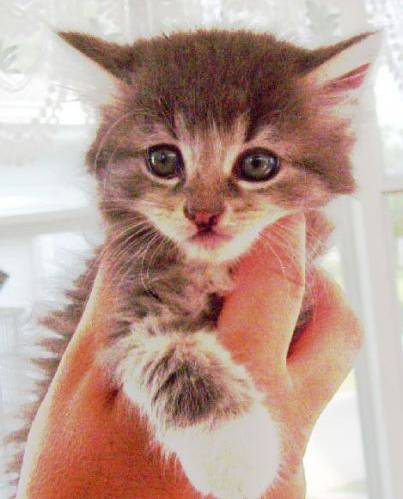

In [8]:
cat_img[0]

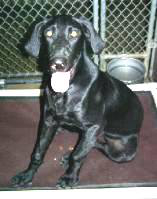

In [9]:
cat_img[145]

# Preprocessing our images





1.   Convert to numpy arrays
2.   Normalize the array to 255

















In [10]:
train_imgs=np.array(train_imgs)
test_imgs=np.array(test_imgs)

In [11]:
train_imgs.shape

(202, 150, 150, 3)

In [12]:
train_imgs_normalize=train_imgs/255
test_imgs_normalize=test_imgs/255

In [ ]:
from keras.applications.vgg16 import preprocess_input

# One hot encode our train and test labels

In [13]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(training_labels)
training_labels_le=le.transform(training_labels)
test_labels_le=le.transform(test_labels)

In [14]:
training_labels_le

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [15]:
test_labels_le

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
training_labels_le.shape

(202,)

Now, our train and test labels are not in a very proper shape, we need to reshape it into an array of numbers

In [17]:
y_train = np.asarray(training_labels_le).astype('float32').reshape((-1,1))
y_test = np.asarray(test_labels_le).astype('float32').reshape((-1,1))

In [18]:
y_train.shape
y_test.shape

(100, 1)

# Building our first model

First, we will build a basic CNN model. Then,we will be implementing VG16 as a transfer learning practice to get better results.

In [19]:
from keras.layers import Dense,Activation,Conv2D,MaxPool2D,Flatten
from keras.models import Sequential
from keras.applications import vgg16


In [ ]:
model1=Sequential()

model1.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model1.add(MaxPool2D(2,2))

model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPool2D(2,2))


model1.add(Conv2D(128,(3,3),activation='relu'))
model1.add(MaxPool2D(2,2))

model1.add(Flatten())
model1.add(Dense(1024,activation='relu'))
model1.add(Dense(64,activation='relu'))

model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model1.fit(train_imgs_normalize,y_train,validation_data=(test_imgs_normalize,y_test),epochs=10)

Epoch 1/10
7/7 [==============================] - 33s 120ms/step - loss: 0.7700 - accuracy: 0.5446 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 0s 40ms/step - loss: 0.6898 - accuracy: 0.5248 - val_loss: 0.6873 - val_accuracy: 0.5700
Epoch 3/10
7/7 [==============================] - 0s 40ms/step - loss: 0.6747 - accuracy: 0.5396 - val_loss: 0.6720 - val_accuracy: 0.5800
Epoch 4/10
7/7 [==============================] - 0s 40ms/step - loss: 0.6475 - accuracy: 0.6535 - val_loss: 0.6809 - val_accuracy: 0.5700
Epoch 5/10
7/7 [==============================] - 0s 40ms/step - loss: 0.6121 - accuracy: 0.6733 - val_loss: 0.6896 - val_accuracy: 0.5100
Epoch 6/10
7/7 [==============================] - 0s 40ms/step - loss: 0.5483 - accuracy: 0.7129 - val_loss: 0.6785 - val_accuracy: 0.5700
Epoch 7/10
7/7 [==============================] - 0s 40ms/step - loss: 0.4763 - accuracy: 0.7772 - val_loss: 0.8398 - val_accuracy: 0.6100
Epoch 8/10
7/7 [=========

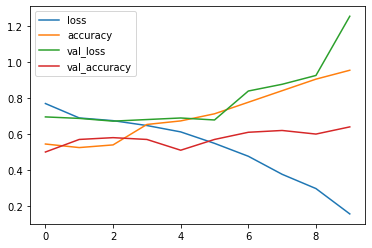

In [ ]:
pd.DataFrame(model1.history.history).plot()

Clearly, our model is overfitting. But it is not bad considering the first model.

In [ ]:
model1.prediction=model1.predict(test_imgs_normalize)

In [ ]:
model1.prediction=np.round(model1.prediction)

In [ ]:
model1.prediction[:5]

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
y_test[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

### First model evaluation

In [64]:
from sklearn.metrics import classification_report,plot_confusion_matrix
import seaborn as sns

In [ ]:
print(classification_report(model1.prediction,y_test))

              precision    recall  f1-score   support

         0.0       0.48      0.71      0.57        34
         1.0       0.80      0.61      0.69        66

    accuracy                           0.64       100
   macro avg       0.64      0.66      0.63       100
weighted avg       0.69      0.64      0.65       100



# Second model with vg16

In [20]:
from keras.applications import vgg16

In [34]:
VG16=vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
VG16.trainable=False

In [35]:
model2=Sequential()


model2.add(VG16)


model2.add(Flatten())
model2.add(Dense(1024,activation='relu'))
model2.add(Dense(521,activation='relu'))
model2.add(Dense(64,activation='relu'))

model2.add(Dense(1,activation='sigmoid'))

In [36]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dense_4 (Dense)              (None, 521)               534025    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                33408     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 23,671,818
Trainable params: 23,671,818
Non-trainable params: 0
__________________________________________

In [26]:
model2.fit(train_imgs_normalize,y_train,validation_data=(test_imgs_normalize,y_test),epochs=10)

Epoch 1/10
7/7 [==============================] - 42s 810ms/step - loss: 3.1877 - accuracy: 0.5000 - val_loss: 1.3497 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 1s 206ms/step - loss: 1.0891 - accuracy: 0.4901 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 1s 208ms/step - loss: 0.7087 - accuracy: 0.4851 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 1s 207ms/step - loss: 0.7156 - accuracy: 0.4901 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 1s 203ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 1s 205ms/step - loss: 0.6932 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 1s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
7/7 [===

Looks like we need to increase the model's training time 

In [37]:
model2.fit(train_imgs_normalize,y_train,validation_data=(test_imgs_normalize,y_test),epochs=30)

Epoch 1/30
7/7 [==============================] - 2s 154ms/step - loss: 1.4331 - accuracy: 0.4752 - val_loss: 0.7555 - val_accuracy: 0.5000
Epoch 2/30
7/7 [==============================] - 1s 94ms/step - loss: 0.5540 - accuracy: 0.7030 - val_loss: 0.4556 - val_accuracy: 0.8400
Epoch 3/30
7/7 [==============================] - 1s 95ms/step - loss: 0.3767 - accuracy: 0.8267 - val_loss: 0.3742 - val_accuracy: 0.8400
Epoch 4/30
7/7 [==============================] - 1s 93ms/step - loss: 0.1686 - accuracy: 0.9604 - val_loss: 0.3155 - val_accuracy: 0.8500
Epoch 5/30
7/7 [==============================] - 1s 93ms/step - loss: 0.0825 - accuracy: 0.9802 - val_loss: 0.3019 - val_accuracy: 0.8800
Epoch 6/30
7/7 [==============================] - 1s 93ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.3212 - val_accuracy: 0.8500
Epoch 7/30
7/7 [==============================] - 1s 94ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.3256 - val_accuracy: 0.8700
Epoch 8/30
7/7 [==========

### Second model evaluation

To get a higher accuracy, we set the weights in our VG16 layers to not be trainable so that the weights are not reinitialize. That would be using the using the model's architecture and train the model with new weights. But, our model is overfitting a bit.


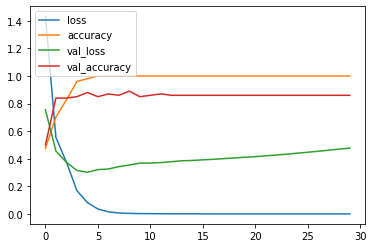

In [39]:
pd.DataFrame(model2.history.history).plot()

# Third model

In [49]:
model3=Sequential()


model3.add(VG16)


model3.add(Flatten())
model3.add(Dense(1024,activation='relu'))
model3.add(Dropout(0.7))
model3.add(Dense(521,activation='relu'))
model3.add(Dropout(0.7))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.7))


model3.add(Dense(1,activation='sigmoid'))

In [50]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
model3.fit(train_imgs_normalize,y_train,validation_data=(test_imgs_normalize,y_test),epochs=30)

Epoch 1/30
7/7 [==============================] - 2s 138ms/step - loss: 2.6614 - accuracy: 0.5297 - val_loss: 0.7623 - val_accuracy: 0.5000
Epoch 2/30
7/7 [==============================] - 1s 96ms/step - loss: 3.6593 - accuracy: 0.5396 - val_loss: 1.2876 - val_accuracy: 0.5000
Epoch 3/30
7/7 [==============================] - 1s 96ms/step - loss: 3.5896 - accuracy: 0.4802 - val_loss: 0.7784 - val_accuracy: 0.5000
Epoch 4/30
7/7 [==============================] - 1s 95ms/step - loss: 2.3955 - accuracy: 0.5347 - val_loss: 0.7017 - val_accuracy: 0.5000
Epoch 5/30
7/7 [==============================] - 1s 97ms/step - loss: 2.5542 - accuracy: 0.5396 - val_loss: 0.6640 - val_accuracy: 0.5600
Epoch 6/30
7/7 [==============================] - 1s 95ms/step - loss: 2.1564 - accuracy: 0.4752 - val_loss: 0.6425 - val_accuracy: 0.7500
Epoch 7/30
7/7 [==============================] - 1s 96ms/step - loss: 1.7146 - accuracy: 0.5248 - val_loss: 0.6626 - val_accuracy: 0.6500
Epoch 8/30
7/7 [==========

## Third model evaluation

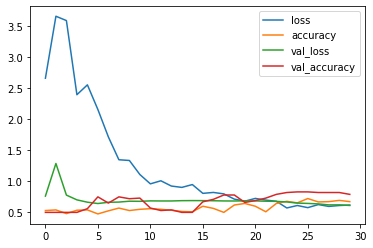

In [52]:
pd.DataFrame(model3.history.history).plot()

In [58]:
import matplotlib.pyplot as plt

In [56]:
accuracy=model3.history.history['accuracy']
val_accuracy=model3.history.history['val_accuracy']

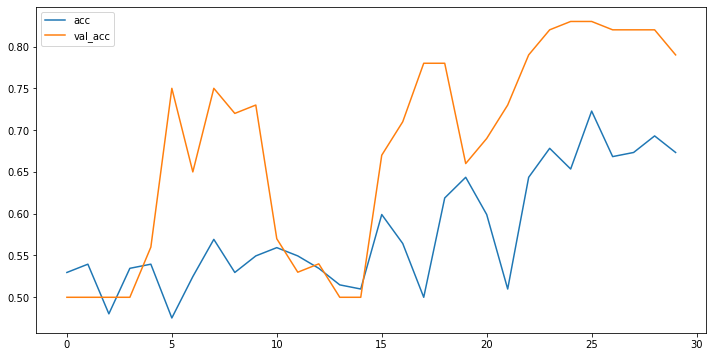

In [62]:
plt.figure(figsize=(12,6))
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.legend(['acc', 'val_acc'], loc='upper left')


Validation accuracy is lower than the second model(without dropout layers) but we managed not to overfit the model.

In [65]:
model3_preds=model3.predict(test_imgs_normalize)

In [69]:
model3_preds=np.round(model3_preds)
model3_preds[:5]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [70]:
print(classification_report(y_test,model3_preds))

              precision    recall  f1-score   support

         0.0       0.72      0.94      0.82        50
         1.0       0.91      0.64      0.75        50

    accuracy                           0.79       100
   macro avg       0.82      0.79      0.79       100
weighted avg       0.82      0.79      0.79       100



In [72]:
model3_preds[:5]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [74]:
y_test[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

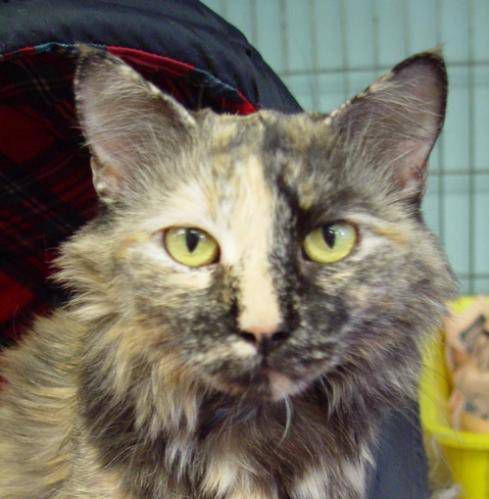

In [75]:
cat_img[1]